In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import daily cost csv
df = pd.read_csv('dailyCost7_14_2025_to_8_12_2025.csv')
# import hourly cost csv
df1 = pd.read_csv('hourlyCost7_14_2025_to_8_5_2025.csv')
# convert usage date to pandas datetime
df['Usage date'] = pd.to_datetime(df['Usage date'])
# remove $ and covert to float
df['Total cost'] = df['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
# create a new column with the day of week
df['Day of week'] = df['Usage date'].dt.day_name()
print(df.dtypes)
df.head()

Meter read date                 object
Usage date              datetime64[ns]
Total cost                     float64
High temperature (F)           float64
Low temperature (F)            float64
Day of week                     object
dtype: object


,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
0,7/15/2025,2025-07-14,6.81,105.0,87.0,Monday
1,7/16/2025,2025-07-15,4.42,105.0,86.0,Tuesday
2,7/17/2025,2025-07-16,3.23,95.0,82.0,Wednesday
3,7/18/2025,2025-07-17,3.53,100.0,80.0,Thursday
4,7/19/2025,2025-07-18,5.17,106.0,86.0,Friday


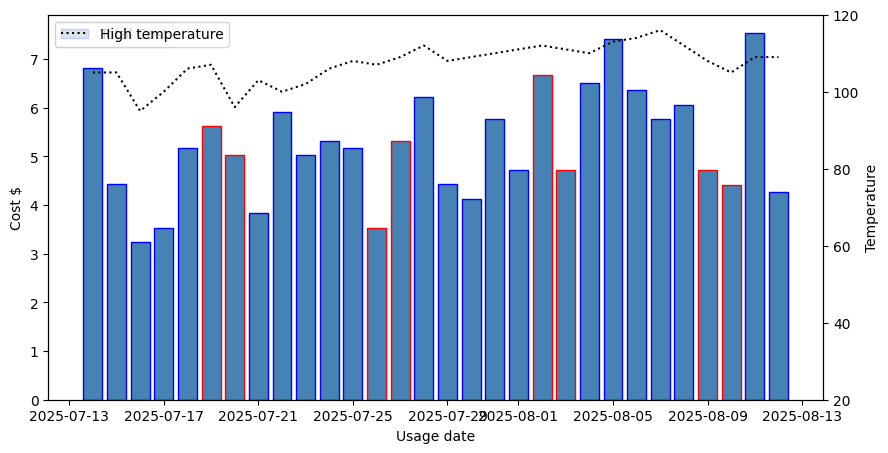

In [3]:
# create a list that assignes colors for the weekdays/weekends for Day of Week
colors = ['red' if day in ['Saturday', 'Sunday'] else 'blue' for day in df['Day of week']]
# initate figure and axis for plotting
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(df['Usage date'], df['Total cost'], edgecolor = colors, color = 'steelblue', label = 'Total Cost')
# create a secondary axis on the same figure for the temperature
ax1 = ax.twinx()
ax1.plot(df['Usage date'], df['High temperature (F)'], 'k', ls = 'dotted', label = 'High temperature') 
ax.set_xlabel('Usage date')
ax.set_ylabel('Cost $')
#ax.set_ylim(0,8)
ax1.set_ylabel('Temperature')
ax1.set_ylim(20,120)
ax.legend()
ax1.legend()

mean    5.252000
max     7.530000
min     3.230000
std     1.130091
Name: Total cost, dtype: float64


<Axes: title={'center': 'Number of times above average usage'}, xlabel='Day of week'>

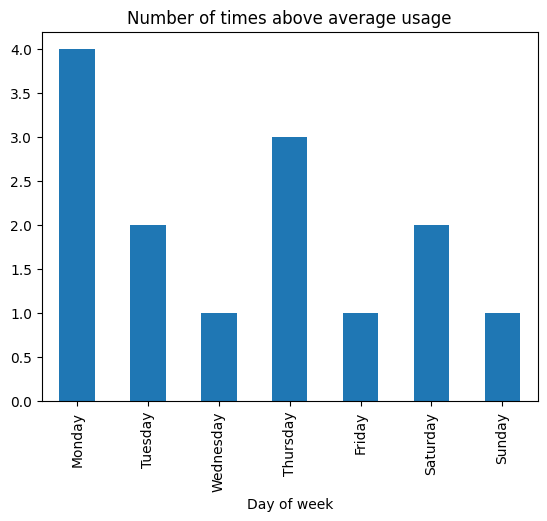

In [4]:
# get the mean, max, min, and standard deviation of the data set
stat = df['Total cost'][:-1].agg(['mean', 'max', 'min', 'std'])
print(stat)
# create a data frame that contains the days that have above average energy use
above_average = df[df['Total cost'].ge(stat['mean'])]
# Group and count the days of week that are above average energy use
day_groups = above_average.groupby('Day of week')['Day of week'].value_counts()
# create new index to sort the days of week chronologically
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_groups.index = pd.CategoricalIndex(day_groups.index, categories=days_order, ordered=True)
day_groups = day_groups.sort_index()
# bar graph of the days of week that are above average 
day_groups.plot(kind='bar', title='Number of times above average usage')

In [5]:
weekend_costs = df[df["Day of week"].isin(["Saturday", "Sunday"])]["Total cost"]
print(weekend_costs)

5     5.62
6     5.02
12    3.53
13    5.32
19    6.66
20    4.72
26    4.72
27    4.41
Name: Total cost, dtype: float64


,Usage date,Interval,Total cost,Datetime,Day of week
0,7/14/2025,12:0 AM,0.12,2025-07-14 00:00:00,Monday
1,7/14/2025,1:0 AM,0.11,2025-07-14 01:00:00,Monday
2,7/14/2025,2:0 AM,0.12,2025-07-14 02:00:00,Monday
3,7/14/2025,3:0 AM,0.11,2025-07-14 03:00:00,Monday
4,7/14/2025,4:0 AM,0.10,2025-07-14 04:00:00,Monday


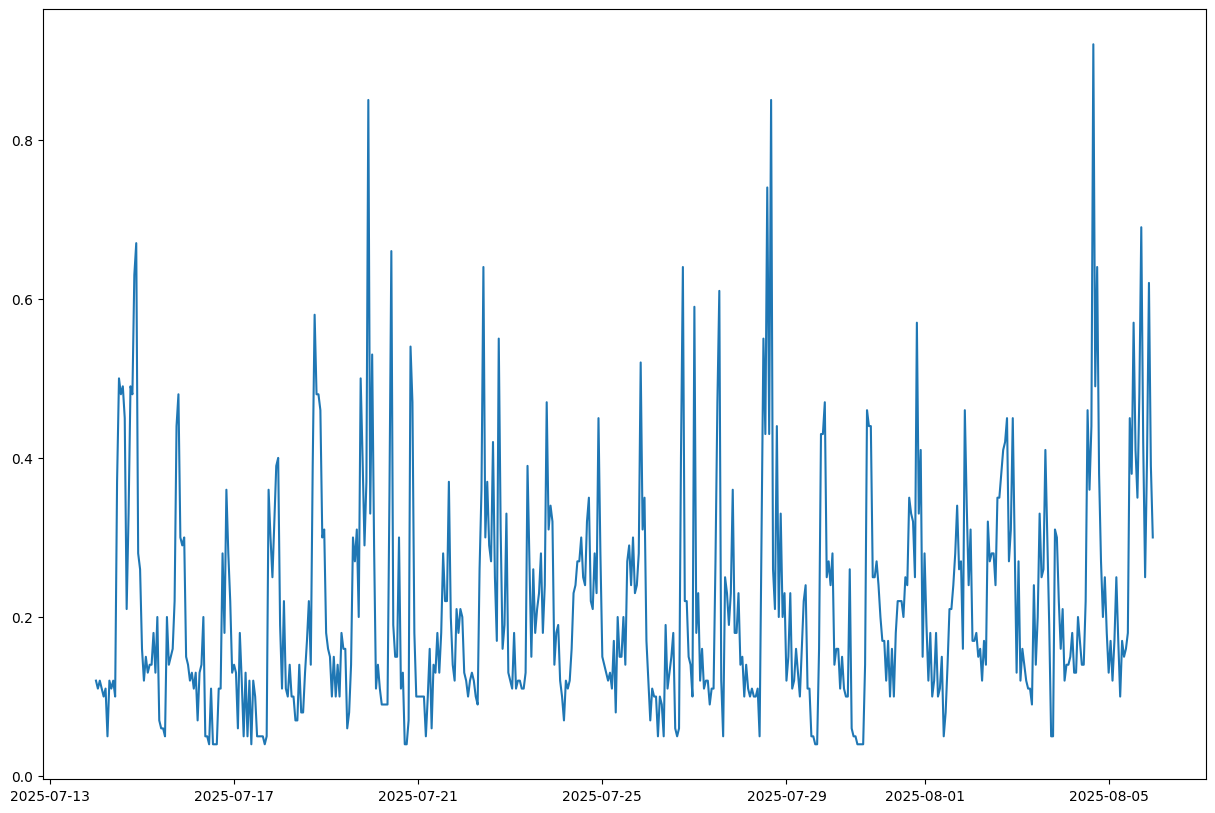

In [33]:
df1['Total cost'] = df1['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df1["Datetime"] = pd.to_datetime(df1["Usage date"] + " " + df1["Interval"], format="%m/%d/%Y %I:%M %p")
df1['Day of week'] = df1['Datetime'].dt.day_name()

fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df1['Datetime'], df1['Total cost'])
df1.head()